<h2> Variação de angulo de estabilidade em um gerador síncrono

A potência por fase de um gerador síncrono é dada por:

$$P = \dfrac{V_t E_f}{|Z_s|} \cdot cos\left( \theta_s - \delta \right) - \dfrac{V^2_t}{|Z_s|} \cdot cos\left( \theta_s \right)$$

Como queremos que a expressão fique em termos de $R_a$ e $\delta$, devemos escrever $|Z_s|$ e $\theta_s$ em função de $R_a$:

$$Z_s = R_a + jX_s \implies |Z_s| = \sqrt{R^2_a + X^2_s} \quad \text{e} \quad \theta_s = tg^{-1}\left( \dfrac{X_s}{R_a} \right)$$

Substituíndo na expressão da potência e multiplicando por 3 para encontrar a potência trifásica, temos:

$$P_{3\phi} = 3 \left[\dfrac{V_t E_f}{\sqrt{R^2_a + X^2_s}} \cdot cos\left( tg^{-1}\left( \dfrac{X_s}{R_a} \right) - \delta \right) - \dfrac{V^2_t}{\sqrt{R^2_a + X^2_s}} \cdot cos\left( tg^{-1}\left( \dfrac{X_s}{R_a} \right) \right) \right]$$

$$P_{3\phi} = 3 \left[\dfrac{13,8k \cdot 15k}{\sqrt{R^2_a + 2,5^2}} \cdot cos\left( tg^{-1}\left( \dfrac{2,5}{R_a} \right) - \delta \right) - \dfrac{(15k)^2}{\sqrt{R^2_a + 2,5^2}} \cdot cos\left( tg^{-1}\left( \dfrac{2,5}{R_a} \right) \right) \right]$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Definindo as grandezas 

Vt = 13800
Ef = 15000
Xs = 2.5
Ra = np.linspace(0.2, 1, 5)
delta = np.linspace(0, 180, 100)
delta_rad = delta*2*np.pi/360
Pmax = 0

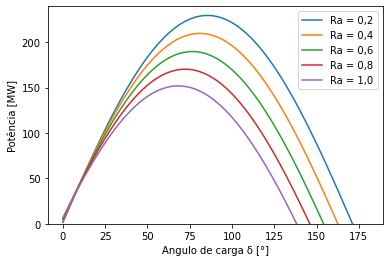

In [27]:
# Preparando o plot
plt.xlabel("Angulo de carga δ [°]")
plt.ylabel("Potência [MW]")

for R in Ra:
  
  # Calculando |Z_s| e omega_s
  Z_mod = np.sqrt(R**2 + Xs**2)
  theta_s = np.arctan(Xs/R)
  
  # Calculando a potência
  P = 3*((Ef*Vt/Z_mod)*np.cos(theta_s - delta_rad)-(Vt**2/Z_mod)*np.cos(theta_s))/1000000
  
  if Pmax < P.max():
    Pmax = P.max()

  # Plotando o gráfico
  plt.plot(delta, P)
  plt.ylim(0, Pmax + 10)

plt.legend(["Ra = 0,2", "Ra = 0,4", "Ra = 0,6", "Ra = 0,8", "Ra = 1,0"])
plt.savefig("Curva P-delta com a variacao de Ra.jpg")
plt.show()

Percebe-se que, com o aumento da resistência de armadura $R_a$, a potência desenvolvida pelo gerador diminui, assim como o ângulo de carga no qual a potência máxima ocorre. Como esse ângulo marca o limiar da estabilidade da máquina, uma maior resistência de armadura faz com que cargas cada vez menores possam ser ligadas à máquina, limitando a ligação de cargas muito indutivas.